### 任务：
1. 基于mnist数据集，建立 MLP 模型，实现0-9数字的十分类task：：
2. 实现mnist数据载入，可视化图形数字
3. 完成数据预处理：图像数据维度转换与归一化、输出结果格式转换
4. 计算模型在预测数据集的准确率
5. 模型结构：两层隐藏层，每层有392个神经元

In [1]:
# 控制以允许JupyterNotebook多个输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from keras.datasets import mnist
import numpy as np

Using TensorFlow backend.


In [3]:
# loada data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(60000, 28, 28)

(60000,)

(10000, 28, 28)

(10000,)

In [4]:
# data visualization
import matplotlib.pyplot as plt
image = X_train[0]
plt.imshow(image)
plt.show()
y_train[0]

<Figure size 640x480 with 1 Axes>

5

In [5]:
# data preprocessing
X_train_format = X_train.reshape(X_train.shape[0], -1)
X_test_format = X_test.reshape(X_test.shape[0], -1)
X_train_format.shape
X_test_format.shape

(60000, 784)

(10000, 784)

In [6]:
from keras.utils import to_categorical
y_train_format = to_categorical(y_train)
y_test_format = to_categorical(y_test)
y_train_format.shape
y_test_format.shape

(60000, 10)

(10000, 10)

In [7]:
# nomalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train_format)
X_test_norm = scaler.transform(X_test_format)
X_train_norm[0]
X_test_norm[0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.41807799e-03, -5.75481961e-03, -4.08251693e-03, -4.08251693e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.08251693e-03, -4.70968827e-03, -8.79934640e-03, -1.15905591e-02,
       -1.47589798e-02, -1.92848546e-02, -2.46717975e-02, -2.90710271e-02,
       -3.05926583e-02, -3.11640127e-02, -3.19628719e-02, -3.02025355e-02,
       -3.13102175e-02, -2.83833960e-02, -2.31191906e-02, -1.91666260e-02,
       -1.67723008e-02, -1.09963601e-02, -8.32486080e-03, -4.38069356e-03,
        0.00000000e+00,  

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.41807799e-03, -5.75481961e-03, -4.08251693e-03, -4.08251693e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.08251693e-03, -4.70968827e-03, -8.79934640e-03, -1.15905591e-02,
       -1.47589798e-02, -1.92848546e-02, -2.46717975e-02, -2.90710271e-02,
       -3.05926583e-02, -3.11640127e-02, -3.19628719e-02, -3.02025355e-02,
       -3.13102175e-02, -2.83833960e-02, -2.31191906e-02, -1.91666260e-02,
       -1.67723008e-02, -1.09963601e-02, -8.32486080e-03, -4.38069356e-03,
        0.00000000e+00,  

In [8]:
# build model
from keras.models import Sequential
from keras.layers import Dense

In [9]:
mlp_model = Sequential()
mlp_model.add(Dense(input_dim=784, units=392, activation='sigmoid', ))
mlp_model.add(Dense(units=392, activation='sigmoid'))
mlp_model.add(Dense(units=10, activation='softmax'))
mlp_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 392)               307720    
_________________________________________________________________
dense_2 (Dense)              (None, 392)               154056    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3930      
Total params: 465,706
Trainable params: 465,706
Non-trainable params: 0
_________________________________________________________________


In [10]:
mlp_model.compile(loss='categorical_crossentropy', optimizer='adam')

In [12]:
mlp_model.fit(X_train_norm, y_train_format, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 17s 291us/step - loss: 0.2807
Epoch 2/10
60000/60000 [==============================] - ETA: 0s - loss: 0.122 - 17s 286us/step - loss: 0.1228
Epoch 3/10
60000/60000 [==============================] - 16s 259us/step - loss: 0.0743
Epoch 4/10
60000/60000 [==============================] - 16s 265us/step - loss: 0.0460
Epoch 5/10
60000/60000 [==============================] - 15s 249us/step - loss: 0.0311
Epoch 6/10
60000/60000 [==============================] - 14s 241us/step - loss: 0.0206
Epoch 7/10
60000/60000 [==============================] - 14s 242us/step - loss: 0.0155
Epoch 8/10
60000/60000 [==============================] - 15s 243us/step - loss: 0.0133
Epoch 9/10
60000/60000 [==============================] - 15s 246us/step - loss: 0.0105
Epoch 10/10
60000/60000 [==============================] - 15s 243us/step - loss: 0.0097


In [14]:
# predict
y_predict = mlp_model.predict_classes(X_test_norm)
y_predict

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [15]:
# socre
from sklearn.metrics import accuracy_score
accuracy_score(y_predict, y_test)

0.971

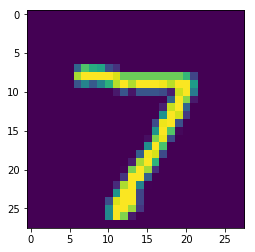

7

In [18]:
plt.imshow(X_test[0])
plt.show()
y_predict[0]